# Building a Pie Chart

This assignment looks at building a pie chart to examine the email domains of users in a sample file.

## Import Libraries
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Import Data
---

In [2]:
df = pd.read_csv('/workspaces/4369/assignments/assignment 3/people-1000.csv')

## Examining the Data 
---

In [3]:
df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


## Cleaning up the domain field
---

The email field needs to be tidied up a bit before we can use it in a pie chart. Pie charts work best with a limited number of categories. That means we need to group the emails in some manner before we look at them in a pie chart. As there are a large number of shared domains amoung the emails (.org, .net, etc), we can use those.

First we need to remove the names and the @ symbol before the domains in the email field.

In [12]:
df['domain'] = df['Email'].str.split('@').str[1]
df.head(3)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org


In [6]:
df['domain'].info

<bound method Series.info of 0      example.org
1      example.net
2      example.org
3      example.com
4      example.net
          ...     
995    example.net
996    example.com
997    example.org
998    example.net
999    example.org
Name: domain, Length: 1000, dtype: object>

Next, for readibility reasons, we're also strip out the example text infront of the top level domains.

In [7]:
TLD = df['domain'].str.replace('example', '', regex=True)
print(TLD)


0      .org
1      .net
2      .org
3      .com
4      .net
       ... 
995    .net
996    .com
997    .org
998    .net
999    .org
Name: domain, Length: 1000, dtype: object


Now we're left with a series of easily groupable resutls which should be easily readible on a pie chart.

## Building the Pie Chart
---

Now that the data is ready we can generate the pie chart.

Text(0.5, 1.0, 'Ratio of Email Domain Holders by Top Level Domain')

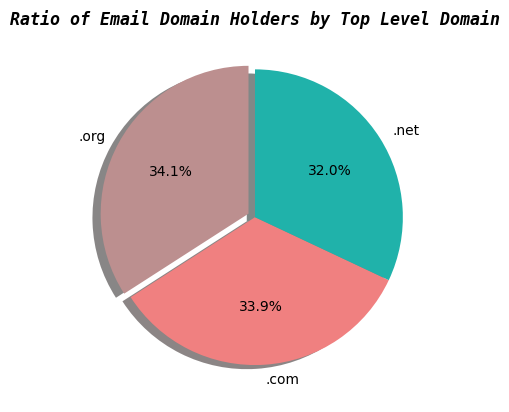

In [8]:
TLDC = TLD.value_counts()
TLDCL = TLD.value_counts().index
explode = (0.05, 0, 0)

# Plot Pie chart
plt.pie(TLDC, labels=TLDCL, explode=explode, autopct='%1.1f%%', colors=['rosybrown', 'lightcoral', 'lightseagreen'],
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)

# Add a title to the pie chart
plt.title('Ratio of Email Domain Holders by Top Level Domain', fontweight='bold', style='italic', family='monospace') 




We can see that the high level domains are fairly evenly split between .net, .com and .org, with .org being the most popular at 34.1%.